<a href="https://colab.research.google.com/github/AkReposuiii/ML-labs/blob/main/agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [ ]:
anime = pd.read_csv("/content/anime.csv")
rating = pd.read_csv("/content/rating.csv")

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Modeling user rating

In [ ]:
 rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


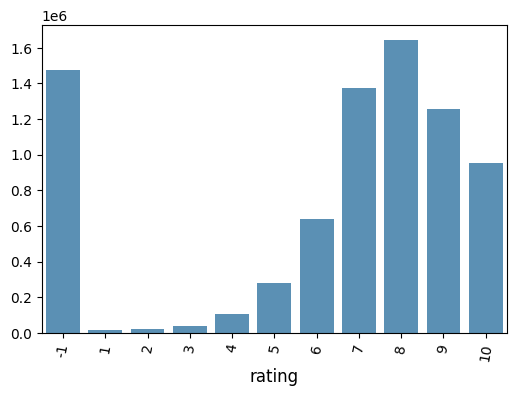

In [ ]:
cnt_pro = rating['rating'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.xlabel('rating', fontsize=12)
plt.xticks(rotation=80)
plt.show();

Here we are computing the ratings with each user_id, first group the user_id and get max and mean of ratings

In [ ]:
#display(rating[["user_id","rating",]].groupby(["user_id"]).agg(["max",'mean']).style.background_gradient(cmap="copper"))

In [ ]:
Mean_rate = rating.groupby(['user_id']).mean().reset_index()
Mean_rate['mean_rating'] = Mean_rate['rating']
Mean_rate.drop(['anime_id','rating'],axis=1, inplace=True)


In [ ]:
Mean_rate.head()

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


In [ ]:
user = pd.merge(rating,Mean_rate,on=['user_id','user_id'])
user.head()


,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [ ]:
user = user.drop(user[user.rating < user.mean_rating].index)
user

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667
...,...,...,...,...
7813730,73515,13659,8,7.719388
7813733,73515,17187,9,7.719388
7813734,73515,22145,10,7.719388
7813735,73516,790,9,9.000000


In [ ]:
user[user['user_id']==2].head(10)


,user_id,anime_id,rating,mean_rating
153,2,11771,10,2.666667


In [ ]:
user[user['user_id']==1].head(10)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


# # Merge Dataset

Because Hierarchical clustering has High space and time complexity. Hence this clustering algorithm cannot be used when we have huge data. So we reduce the data, this work we only use 10000 data

In [ ]:
Data = pd.merge(anime,user,on=['anime_id','anime_id'])
Data= Data[Data.user_id <= 10000]
Data.head(10)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570939 entries, 0 to 4262455
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   anime_id     570939 non-null  int64  
 1   name         570939 non-null  object 
 2   genre        570937 non-null  object 
 3   type         570939 non-null  object 
 4   episodes     570939 non-null  object 
 5   rating_x     570939 non-null  float64
 6   members      570939 non-null  int64  
 7   user_id      570939 non-null  int64  
 8   rating_y     570939 non-null  int64  
 9   mean_rating  570939 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 47.9+ MB


In [ ]:
len(Data['anime_id'].unique())


7040

In [ ]:
len(Data['user_id'].unique())


10000

Show detail of anime which each user like


In [ ]:
user_anime = pd.crosstab(Data['user_id'], Data['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Agglomerative Clustering

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(user_anime, method='ward'))

Now we know the number of clusters for our dataset, the next step is to group the data points into these ten clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(user_anime)


You can see the cluster labels from all of your data points.

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(user_anime.iloc[:,0], user_anime.iloc[:,1], c=cluster.labels_, cmap='rainbow')

References

* [[1](https://nlp.stanford.edu/IR-book/pdf/17hier.pdf)] Hierarchical clustering. DRAFT! © April 1, 2009 Cambridge University Press
* [[2](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)] . Time Complexity Hierarchical clustering
* [[3](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)] Hierarchical clustering

# On progress :)